<a href="https://colab.research.google.com/github/PaulaDiz/LABORATORIOS/blob/main/CAPSTONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO FINAL: CAPSTONE**

**Grupo**: B03


**Integrantes**: Paula Diz Diz, Jaime Martínez Torío, Maria Barrio Rodrígez y Lydia Sánchez-Cano Sánchez

# **Aplicaciones de la tienda Google Play**

En esta práctica se realizan distintos modelos de regresión para predicir las distintas 33 categorías de las apps que disponemos en un total de 2 bases de datos googleplaystore.csv que aportan las características de las apps y googleplaystore_user_reviews.csv, que contienen reviews variadas de las mismas apps que en la primera base de datos.

 Para mejorar los modelos se aplicarán distintas técnicas de ingeniería de características vistas tanto en esta asignatura como en la asignatura de aprendizaje automático.

Detalles de las aplicaciones en Google Play. Hay 13 características que describen una aplicación determinada.

- App                
- Category            
- Rating          
- Reviews              
- Size                
- Installs           
- Type               
- Price               
- Content Rating       
- Genres             
- Last Updated        
- Current Ver         
- Android Ver

Importamos las librerías necesarias para realizar la Práctica Final.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

Primero importamos el conjunto de datos de "googleplaystore"

In [2]:
google = pd.read_csv('googleplaystore.csv')

In [3]:
google

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Realicemos la limpieza del conjunto de datos para su posterior utlización.

In [4]:
nan_count = google.isna().sum()
print("Cantidad de valores NaN por columna:")
print(nan_count)

Cantidad de valores NaN por columna:
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [5]:
google = google.dropna()

In [6]:
nan_count = google.isna().sum()
print("Cantidad de valores NaN por columna:")
print(nan_count)

Cantidad de valores NaN por columna:
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [7]:
google

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Importamos el conjunto de datos "googleplaystore_user_reviews" y relizamos el mismo proceso para esta base de datos.

In [8]:
google_r = pd.read_csv('googleplaystore_user_reviews.csv')

In [9]:
google_r

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [10]:
nan_count = google_r.isna().sum()
print("Cantidad de valores NaN por columna:")
print(nan_count)

Cantidad de valores NaN por columna:
App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


In [11]:
google_r = google_r.dropna()

In [12]:
nan_count = google_r.isna().sum()
print("Cantidad de valores NaN por columna:")
print(nan_count)

Cantidad de valores NaN por columna:
App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


In [13]:
google_r

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


Fusionamos ambos conjuntos de datos para tener todas las variables que queremos tener en cuenta.

In [14]:
# Fusión de la base de datos
data = pd.merge(google, google_r, on='App', how='inner')
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72561,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Overall great app. Best gallery seen far,Positive,0.475000,0.512500
72562,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,"Recommended, 100% love it, keep good work dev ...",Positive,0.566667,0.733333
72563,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Too much ads,Positive,0.200000,0.200000
72564,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Just allow time ...,Neutral,0.000000,0.000000


Después de realizar la fusión eliminamos las variables que no necesitamos  y tranformamos las variables que vamos a necesitar para nuestro modelo.

In [15]:
# Eliminación de la columna Translated_Review , ya que no se va a utilizar
data = data.drop('Translated_Review', axis=1)

In [16]:
print(data.dtypes)

App                        object
Category                   object
Rating                    float64
Reviews                    object
Size                       object
Installs                   object
Type                       object
Price                      object
Content Rating             object
Genres                     object
Last Updated               object
Current Ver                object
Android Ver                object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object


In [17]:

unique_categories = data['Category'].unique()
print(unique_categories)
print(len(unique_categories))

['ART_AND_DESIGN' 'FAMILY' 'AUTO_AND_VEHICLES' 'BEAUTY'
 'BOOKS_AND_REFERENCE' 'BUSINESS' 'COMMUNICATION' 'COMICS' 'DATING'
 'EDUCATION' 'ENTERTAINMENT' 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK'
 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME' 'LIBRARIES_AND_DEMO' 'LIFESTYLE'
 'GAME' 'SPORTS' 'MEDICAL' 'SOCIAL' 'SHOPPING' 'PHOTOGRAPHY'
 'TRAVEL_AND_LOCAL' 'TOOLS' 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING'
 'WEATHER' 'VIDEO_PLAYERS' 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
33


In [18]:
# Factorizamos las categorias
data['Category'] = pd.factorize(data['Category'])[0] + 1

In [19]:

print(data['Category'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]


In [20]:
unique_categories = data['Sentiment'].unique()
print(unique_categories)
print(len(unique_categories))
# Factorizamos las categorias
data['Sentiment'] = pd.factorize(data['Sentiment'])[0] + 1
print(data['Sentiment'].unique())

['Negative' 'Neutral' 'Positive']
3
[1 2 3]


In [21]:
unique_categories = data['Genres'].unique()
print(unique_categories)
print(len(unique_categories))
# Factorizamos las categorias
data['Genres'] = pd.factorize(data['Genres'])[0] + 1
print(data['Genres'].unique())

['Art & Design;Pretend Play' 'Art & Design' 'Art & Design;Creativity'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Communication'
 'Comics' 'Dating' 'Education;Education' 'Education' 'Entertainment'
 'Events' 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Casual' 'Puzzle;Brain Games' 'Arcade'
 'Casual;Pretend Play' 'Strategy' 'Action' 'Puzzle' 'Sports'
 'Casual;Creativity' 'Racing' 'Board' 'Simulation' 'Adventure'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Educational;Education'
 'Educational;Pretend Play' 'Racing;Action & Adventure'
 'Entertainment;Music & Video' 'Educational;Brain Games'
 'Casual;Action & Adventure' 'Education;Pretend Play'
 'Simulation;Pretend Play' 'Sports;Action & Adventure'
 'Role Playing;Action & Adventure' 'Puzzle;Action & Adventure'
 'Board;Brain Games' 'Role Playing;Pretend Play' 'Medical' 'Social

In [22]:
unique_categories = data['Content Rating'].unique()
print(unique_categories)
print(len(unique_categories))
data['Content Rating'] = pd.factorize(data['Content Rating'])[0] + 1
print(data['Content Rating'].unique())

['Everyone' 'Teen' 'Mature 17+' 'Everyone 10+' 'Adults only 18+']
5
[1 2 3 4 5]


In [23]:
unique_categories = data['Reviews'].unique()
print(unique_categories)
print(len(unique_categories))
# Convert 'Reviews' to numeri, coercing any errors to NaN (useful if there are non-numeric strings)
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
print("Data type of 'Reviews':", data['Reviews'].dtype)

['967' '974' '13791' ... '179139' '1275373' '223941']
1067
Data type of 'Reviews': int64


In [24]:
unique_categories = data['Content Rating'].unique()
print(unique_categories)
print(len(unique_categories))
data['Content Rating'] = pd.factorize(data['Content Rating'])[0] + 1
print(data['Content Rating'].unique())

[1 2 3 4 5]
5
[1 2 3 4 5]


In [25]:
unique_categories = data['Type'].unique()
print(unique_categories)
print(len(unique_categories))
data['Type'] = pd.factorize(data['Type'])[0] + 1
print(data['Type'].unique())

['Free' 'Paid']
2
[1 2]


Vamos a dividir la columna de sentiment en 3 columnas con reviews positivas, negativas y neutrales para así tener más información y más organizada

In [26]:
total_valores_count = data.groupby('App')['Sentiment'].count()
print(total_valores_count)

App
10 Best Foods for You                                 388
11st                                                   39
1800 Contacts - Lens Store                            160
1LINE – One Line with One Touch                        38
2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif       32
                                                     ... 
Hotels.com: Book Hotel Rooms & Find Vacation Deals    136
Hotspot Shield Free VPN Proxy & Wi-Fi Security         34
Hotstar                                                32
Hotwire Hotel & Car Rental App                         33
Housing-Real Estate & Property                         21
Name: Sentiment, Length: 816, dtype: int64


In [27]:
data['Reviews'] = data['App'].map(total_valores_count)

In [28]:
# Definir el valor específico a contar
valor_especifico = 1

# Agrupar por 'Categoría' y contar apariciones del valor específico
conteo_valor_especifico1 = data.groupby('App')['Sentiment'].apply(lambda x: (x == valor_especifico).sum())



# Definir el valor específico a contar
valor_especifico = 2

# Agrupar por 'Categoría' y contar apariciones del valor específico
conteo_valor_especifico2 = data.groupby('App')['Sentiment'].apply(lambda x: (x == valor_especifico).sum())



# Definir el valor específico a contar
valor_especifico = 3

# Agrupar por 'Categoría' y contar apariciones del valor específico
conteo_valor_especifico3 = data.groupby('App')['Sentiment'].apply(lambda x: (x == valor_especifico).sum())


In [29]:
data['Negative_reviews'] = data['App'].map(conteo_valor_especifico1)
data['Neutral_reviews'] = data['App'].map(conteo_valor_especifico2)
data['Positive_reviews'] = data['App'].map(conteo_valor_especifico3)
data.drop('Sentiment', axis=1, inplace=True)

In [30]:
# Remover comas y el símbolo '+' de la columna 'Installs'
data['Installs'] = data['Installs'].str.replace(',', '').str.replace('+', '')

# Convertir la columna a tipo entero
data['Installs'] = data['Installs'].astype(int)

Después de realizar todo este preprocesamiento realizamos nuestro primer modelo de regresión que intentará predecir las categorías de las Apps

Realizamos una matriz de correlación para ver como están de relacioinadas las variables con Category.

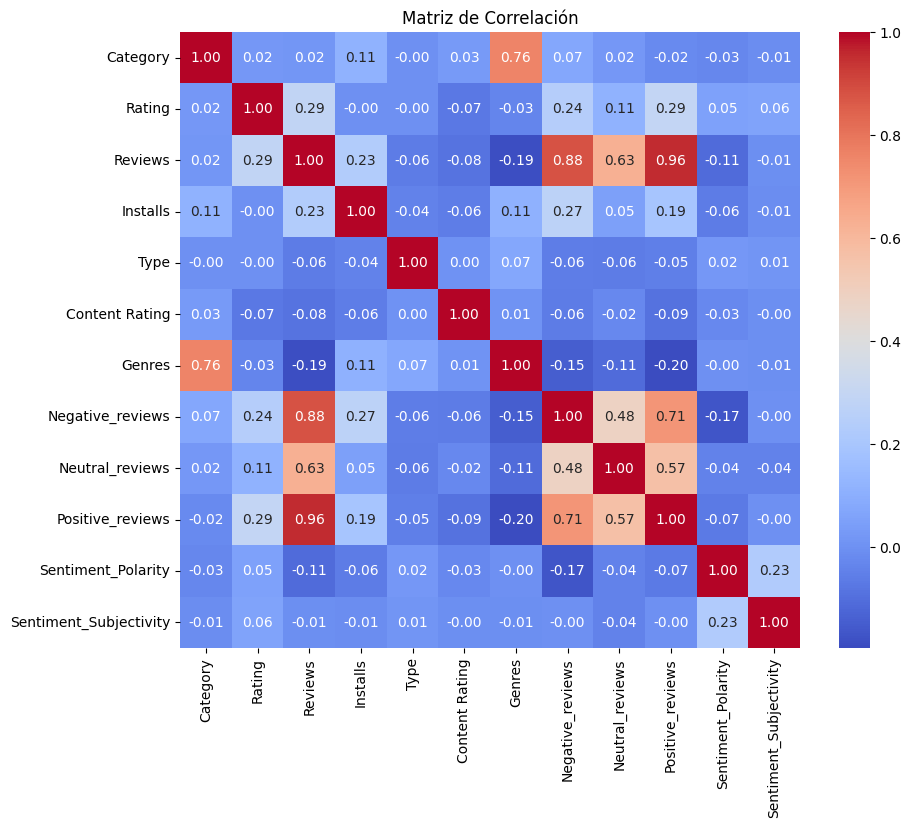

In [31]:
# Lista de variables que te interesan para la matriz de correlación
variables_interes = ['Category',	'Rating',	'Reviews', 'Installs',	'Type', 'Content Rating',	'Genres', 'Negative_reviews',	'Neutral_reviews',	'Positive_reviews',	'Sentiment_Polarity',	'Sentiment_Subjectivity']

# Calculando la matriz de correlación
matriz_correlacion = data[variables_interes].corr()

# Visualizando la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación')
plt.show()

# **1º Modelo**

Haremos un primer modelo con el conjunto de datos resultante después de todo el  preprocesamiento de todas las variables. Además utilizaremos el método **RandomForestRegressor()**

# **RandomForestRegressor**

RandomForestRegressor es un **método de regresión** utilizado dentro del aprendizaje automático supervisado. Específicamente, pertenece a la familia de algoritmos conocidos como "Random Forests" o "bosques aleatorios", que son un tipo de modelos de ensamble.Combina las salidas de diferentes árboles de decisión con el fin de obtener un único y optimizado resultado.



El método RandomForest() se basa en la creación de múltiples árboles de decisión para formar un "bosque", lo cual es un enfoque de aprendizaje ensamblado en el campo del aprendizaje automático supervisado. En este enfoque, el algoritmo no se basa en un solo árbol de decisión, sino que genera varios árboles para aumentar la precisión y evitar el sobreajuste que a menudo ocurre con un solo árbol.



El proceso comienza con la selección aleatoria de muestras del conjunto de datos, el cual debe estar previamente etiquetado ya que estamos hablando de un algoritmo supervisado. Cada uno de estos árboles se entrena de manera independiente con estas muestras aleatorias y desarrolla su propia lógica de decisión basada en las características de los datos.



Para hacer una predicción, Random Forest consulta a cada uno de los árboles en el bosque y recopila sus decisiones. La predicción final se basa en la mayoría de votos entre todos los árboles. Es decir, el resultado más frecuentemente predicho por los árboles es el que se selecciona como la predicción final del modelo. Esto contribuye a que el modelo sea más robusto y preciso, al reducir el riesgo de errores por sesgos individuales de un solo árbol de decisión.


**Características del RandomForestRegressor**


- **Manejo de grandes conjuntos de datos**: Es efectivo para bases de datos grandes y con muchas variables de entrada (características).


- **Robustez frente a sobreajuste**: Gracias a la construcción de múltiples árboles y el promedio de sus resultados, es menos propenso al sobreajuste que un único árbol de decisión.


- **Importancia de las características**: Puede proporcionar insights sobre la importancia relativa de cada característica para la predicción, lo cual es útil para la selección de características.

In [32]:
# Nuevas características basadas en el dominio
data['Positive_Rate'] = data['Positive_reviews'] / (data['Positive_reviews'] + data['Negative_reviews'] + data['Neutral_reviews'])

# Preparación de datos
features = ['Installs', 'Rating', 'Type', 'Content Rating', 'Genres', 'Positive_Rate']
X = data[features]
y = data['Category']


# División y escalado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optimización de hiperparámetros
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
model = grid_search.best_estimator_

# Predicciones y evaluación
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Optimized Mean Squared Error: {mse:.2f}')
print(f'Optimized R^2 Score: {r2:.2f}')

Optimized Mean Squared Error: 4.87
Optimized R^2 Score: 0.92


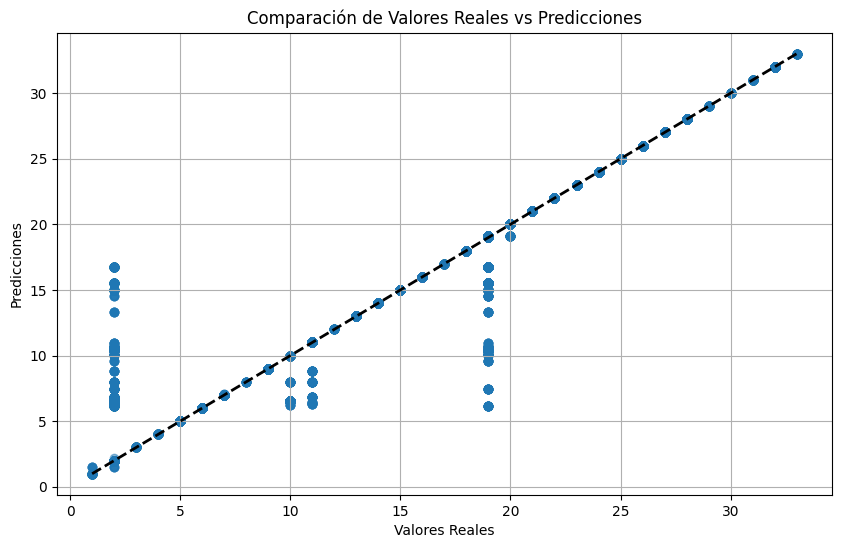

In [33]:
# Gráfico de dispersión de las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea de identidad
plt.title('Comparación de Valores Reales vs Predicciones')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

<ipython-input-34-d454f6fa464c>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=errores_completos.index, y=errores_completos.values, palette='viridis')


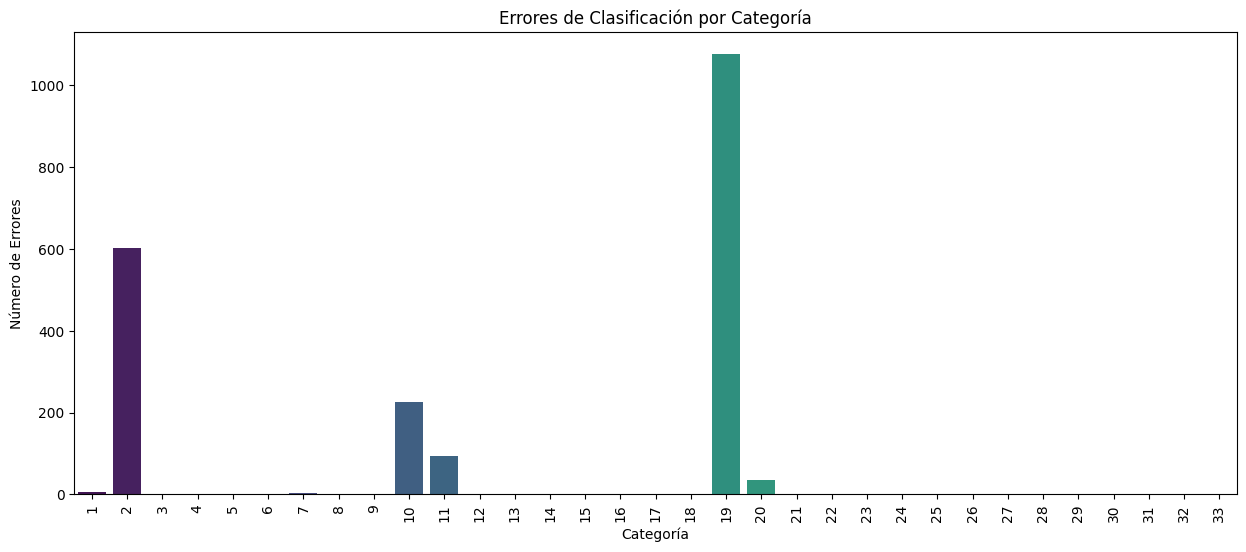

In [34]:
# Haremos que coja todas las variables , independientemente de si haya datos o no para así poder realizar el gráfico.
categorias_completas = list(range(1, 34))



results = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})
results['Error'] = results['Real'] != results['Predicción']

# Contar errores por categoría real
errores_por_categoria = results.groupby('Real')['Error'].sum()

# Inicializar DataFrame con todas las categorías con un conteo de errores de 0
errores_completos = pd.Series(index=categorias_completas, data=0).add(errores_por_categoria, fill_value=0)

# Visualizar
plt.figure(figsize=(15, 6))
sns.barplot(x=errores_completos.index, y=errores_completos.values, palette='viridis')
plt.title('Errores de Clasificación por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Número de Errores')
plt.xticks(rotation=90)
plt.show()


**Curva de aprendizaje**

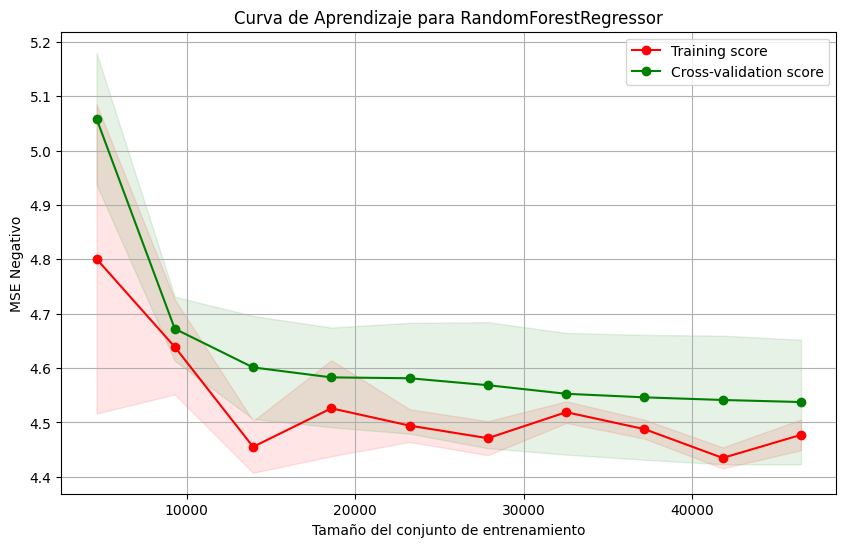

In [35]:

# Calcula las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(model, X_train_scaled, y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error')

# Calcula las medias y desviaciones estándar del error de entrenamiento y de prueba
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Crea el gráfico
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.title("Curva de Aprendizaje para RandomForestRegressor")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("MSE Negativo")
plt.legend(loc="best")
plt.grid()
plt.show()

# **Conjunto de datos con las medias de Sentiment_Polarity y Sentiment_Subjectivity**

Observamos que en el conjunto de datos existen duplicados en ciertos datos ya que existen distintos valores para **Sentiment_Polarity** y **Sentiment_Subjectivity** de la misma aplicación.

Por lo tanto, agrupamos todas las variables que coinciden y presentaremos sus valores de **Sentiment_Polarity** y **Sentiment_Subjectivity** como la media de todos ellos.

Veamos como nos queda y sus modelos posteriormente.

In [36]:
# Calcular la media de Sentiment_Polarity y Sentiment_Subjectivity por App y otras columnas
data = data.groupby(['App','Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver', 'Negative_reviews', 'Neutral_reviews', 'Positive_reviews']).agg({
    'Sentiment_Polarity': 'mean',
    'Sentiment_Subjectivity': 'mean'
}).reset_index()

# Mostrar el DataFrame resultante
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Negative_reviews,Neutral_reviews,Positive_reviews,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,15,4.0,388,3.8M,500000,1,0,4,17,"February 17, 2017",1.9,2.3.3 and up,20,44,324,0.470733,0.495455
1,11st,23,3.8,39,20M,10000000,1,0,1,55,"July 31, 2018",7.8.1,4.0 and up,7,9,23,0.185943,0.455340
2,1800 Contacts - Lens Store,21,4.7,160,26M,1000000,1,0,1,53,"July 27, 2018",7.4.1,5.0 and up,12,20,128,0.318145,0.591098
3,1LINE – One Line with One Touch,19,4.6,38,10M,10000000,1,0,1,31,"August 3, 2018",2.0.4,4.1 and up,8,3,27,0.196290,0.557315
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,27,4.2,32,Varies with device,10000000,1,0,1,60,"May 22, 2018",Varies with device,4.1 and up,1,6,25,0.449566,0.520573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,Hotels.com: Book Hotel Rooms & Find Vacation D...,25,4.5,136,Varies with device,10000000,1,0,1,57,"July 4, 2018",Varies with device,Varies with device,42,16,78,0.101622,0.545444
857,Hotspot Shield Free VPN Proxy & Wi-Fi Security,26,4.2,34,8.2M,50000000,1,0,1,59,"August 6, 2018",6.1.0,4.1 and up,3,14,17,0.251765,0.393284
858,Hotstar,11,4.3,32,Varies with device,100000000,1,0,2,13,"August 3, 2018",Varies with device,Varies with device,14,4,14,0.038178,0.493964
859,Hotwire Hotel & Car Rental App,25,4.3,33,Varies with device,1000000,1,0,1,57,"July 19, 2018",Varies with device,Varies with device,6,11,16,0.187029,0.459717


Ahora tenemos diferentes valores de las **861 aplicaciones** que contiene nuestro conjunto de datos

Ahora realizamos una matriz de adyacencia para viaulizar las relaciones de nuestras variables.

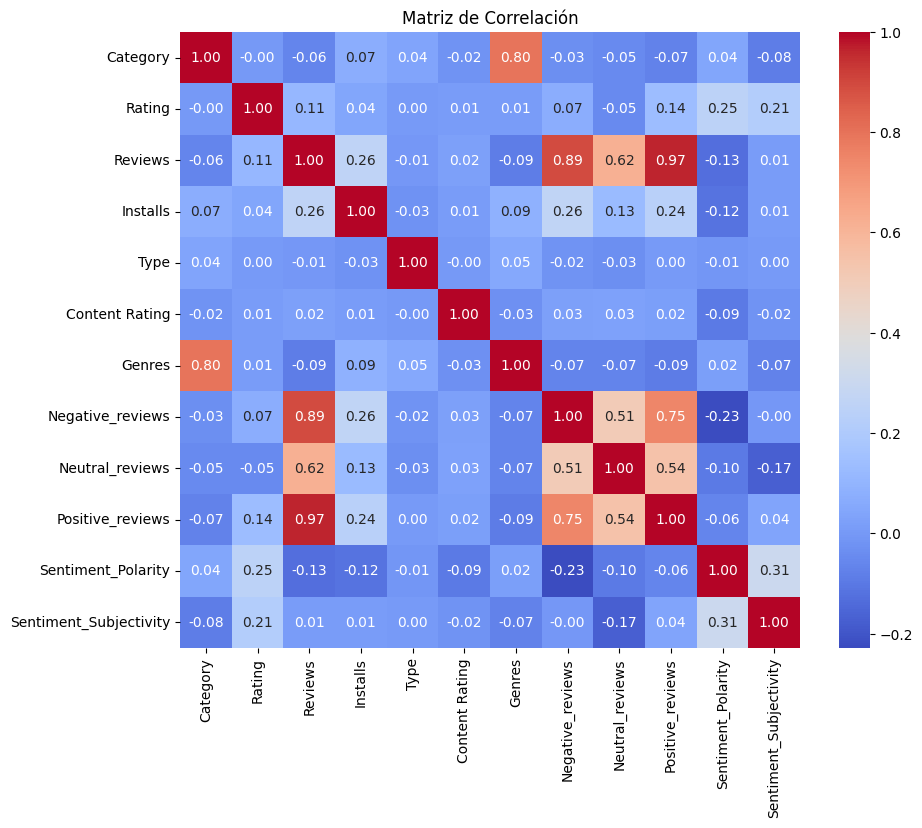

In [37]:
# Lista de variables que te interesan para la matriz de correlación
variables_interes = ['Category',	'Rating',	'Reviews', 'Installs',	'Type', 'Content Rating',	'Genres', 'Negative_reviews',	'Neutral_reviews',	'Positive_reviews',	'Sentiment_Polarity',	'Sentiment_Subjectivity']

# Calculando la matriz de correlación
matriz_correlacion = data[variables_interes].corr()

# Visualizando la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlación')
plt.show()

# **Modelos con las media**

# **2º Modelo**

Realizamos un modelo con las variables que tienen mayor relación.

La variable objetivo es **Category**, en cada uno de nuestros modelos la variable que se desea predecir es la categoría a la que pertenece la aplicación de Google Store.

En este segundo modelo podremos como variables independientes: **Genres** , **Sentiment_Polarity** , **Type** , **Installs**

In [38]:
# Preparar variables para la regresión
features = [ 'Installs', 'Type', 'Sentiment_Polarity', 'Genres',]
X = data[features]
y = data['Category']


# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creación del modelo RandomForest
model = RandomForestRegressor(n_estimators=80, random_state=42)
model.fit(X_train_scaled, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test_scaled)

# Evaluación con validación cruzada
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)


# Métricas finales
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Final Mean Squared Error: {mse:.2f}')
print(f'Final R^2 Score: {r2:.2f}')

Final Mean Squared Error: 10.57
Final R^2 Score: 0.87


Podemos comprobar que obtenemos una precisión de 0.87, es bastante alto. Sin embargo, nuestro error es de un 10.57, un error bastante alto y más tratando de predecir la categoría a la que pertenece la App

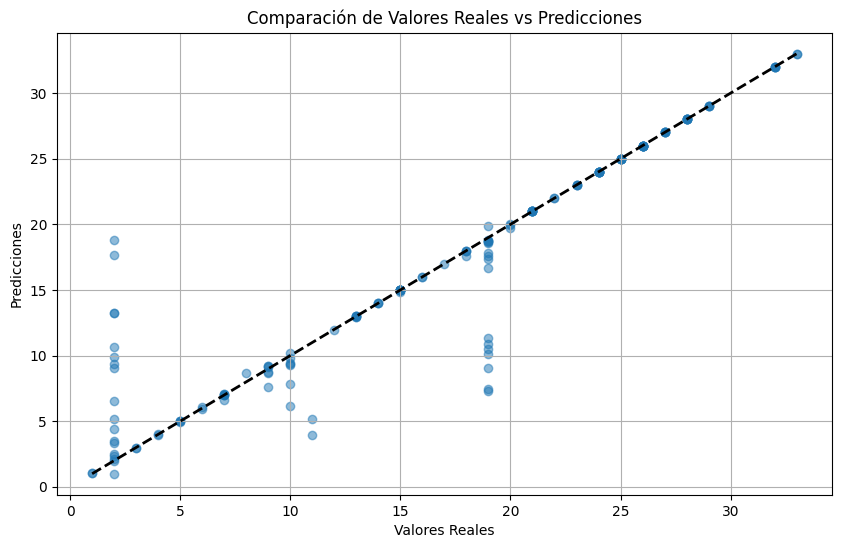

In [39]:
# Gráfico de dispersión de las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Comparación de Valores Reales vs Predicciones')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

<ipython-input-40-a50ee87b828c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=errores_completos.index, y=errores_completos.values, palette='viridis')


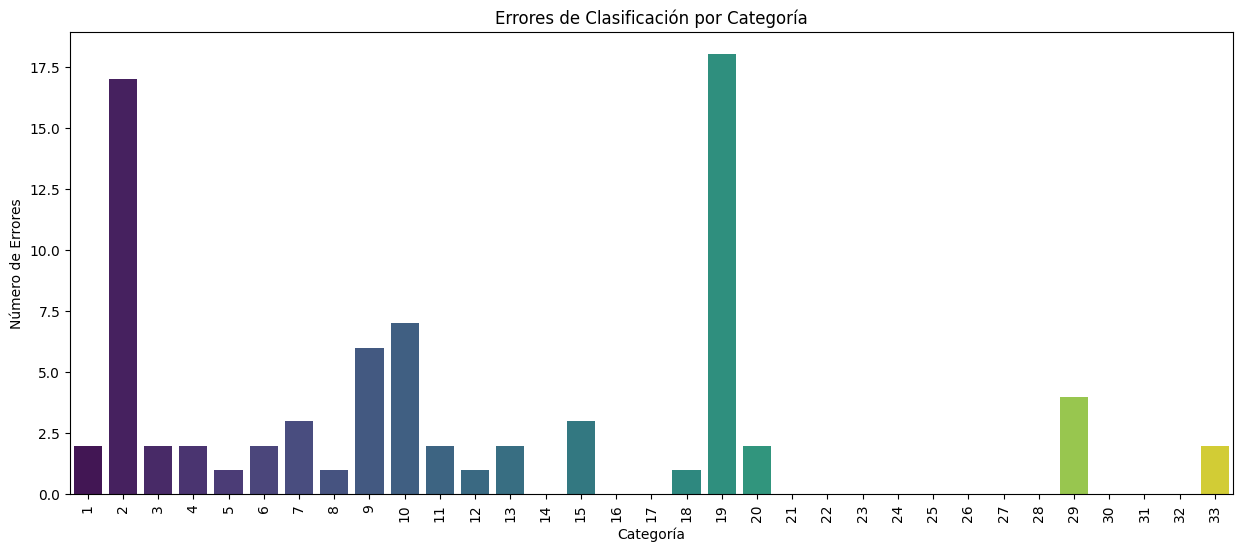

In [40]:

categorias_completas = list(range(1, 34))



results = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})
results['Error'] = results['Real'] != results['Predicción']

# Contar errores por categoría real
errores_por_categoria = results.groupby('Real')['Error'].sum()

# Inicializar DataFrame con todas las categorías con un conteo de errores de 0
errores_completos = pd.Series(index=categorias_completas, data=0).add(errores_por_categoria, fill_value=0)

# Visualizar
plt.figure(figsize=(15, 6))
sns.barplot(x=errores_completos.index, y=errores_completos.values, palette='viridis')
plt.title('Errores de Clasificación por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Número de Errores')
plt.xticks(rotation=90)
plt.show()


# **3º Modelo**

Ahora hagamos un modelo con otras variable para comprobar si podríamos conseguir una mejor precisión.

In [41]:
# Definir las variables independientes y la variable dependiente
X = data[['Rating','Genres','Sentiment_Polarity','Sentiment_Subjectivity','Positive_reviews','Neutral_reviews','Negative_reviews']]
y = data['Category']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creación del modelo RandomForest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_test_pred1 = model.predict(X_test_scaled)

# Evaluar el modelo
r2_test1 = r2_score(y_test, y_test_pred1)
mse1 = mean_squared_error(y_test, y_test_pred1)

# Mostrar los resultados de la evaluación del modelo
print(f'Error del modelo: {mse1:.2f}')
print(f'Bondad de ajuste (R^2): {r2_test1:.2f}')

Error del modelo: 9.57
Bondad de ajuste (R^2): 0.88


Mejora respecto el modelo anterior, incluso utilizando distintas variables.

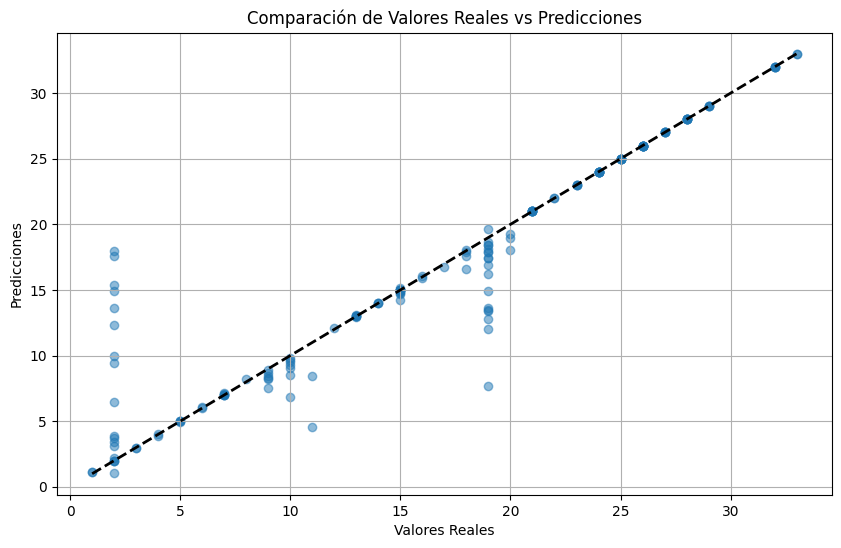

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred1, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea de identidad
plt.title('Comparación de Valores Reales vs Predicciones')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

<ipython-input-43-db8086e72e63>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=errores_completos.index, y=errores_completos.values, palette='viridis')


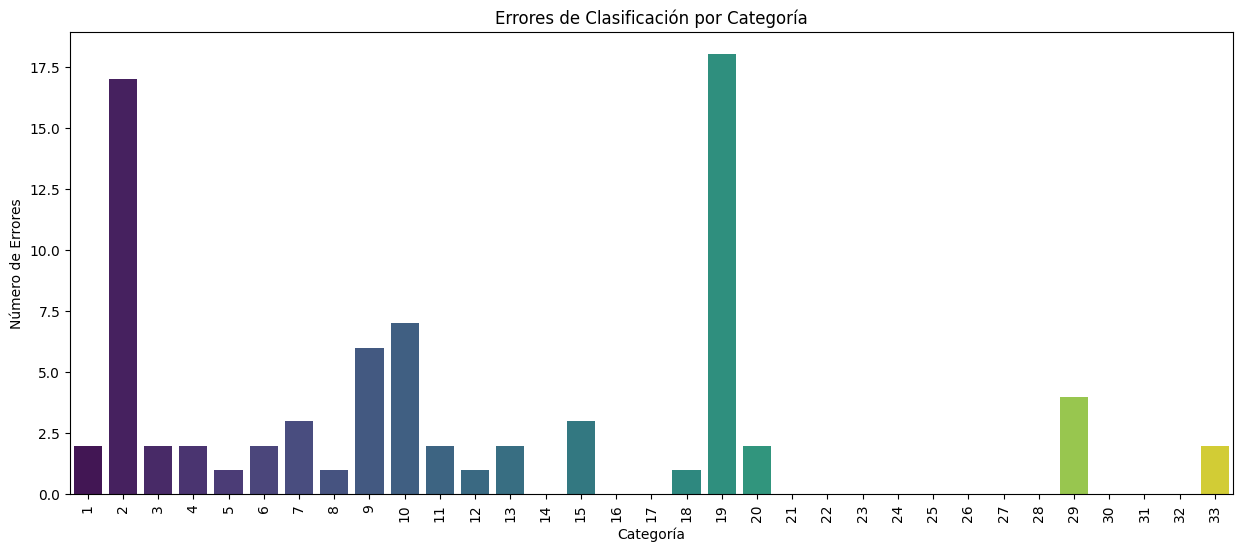

In [43]:

categorias_completas = list(range(1, 34))



results = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})
results['Error'] = results['Real'] != results['Predicción']

# Contar errores por categoría real
errores_por_categoria = results.groupby('Real')['Error'].sum()

# Inicializar DataFrame con todas las categorías con un conteo de errores de 0
errores_completos = pd.Series(index=categorias_completas, data=0).add(errores_por_categoria, fill_value=0)

# Visualizar
plt.figure(figsize=(15, 6))
sns.barplot(x=errores_completos.index, y=errores_completos.values, palette='viridis')
plt.title('Errores de Clasificación por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Número de Errores')
plt.xticks(rotation=90)
plt.show()


# **4º Modelo**

In [44]:
# Preparar variables para la regresión
features = [ 'Rating', 'Type', 'Content Rating', 'Genres']
X = data[features]
y = data['Category']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creación del modelo RandomForest
model = RandomForestRegressor(n_estimators=80, random_state=42)
model.fit(X_train_scaled, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_test_scaled)

# Evaluación con validación cruzada
scores = cross_val_score(model, X_train_scaled, y_train, cv=5)


# Métricas finales
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Final Mean Squared Error: {mse:.2f}')
print(f'Final R^2 Score: {r2:.2f}')

Final Mean Squared Error: 7.02
Final R^2 Score: 0.91


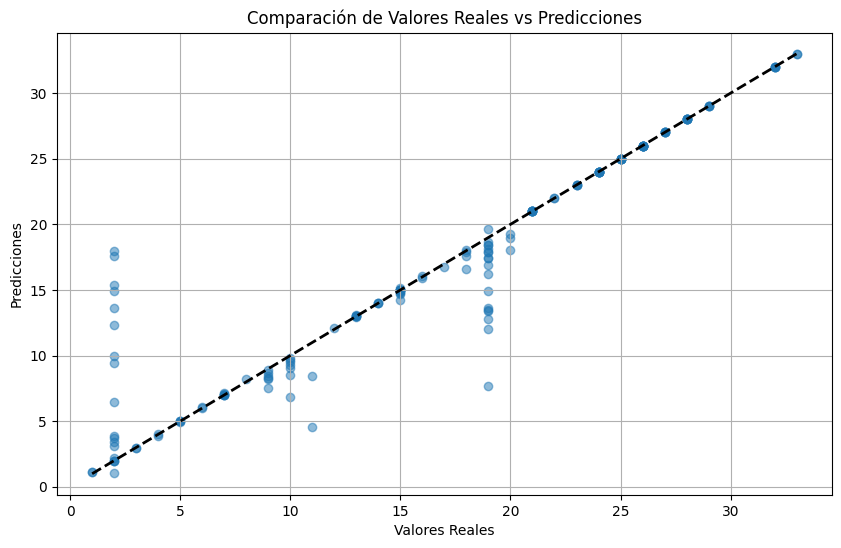

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred1, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Comparación de Valores Reales vs Predicciones')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

<ipython-input-46-db8086e72e63>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=errores_completos.index, y=errores_completos.values, palette='viridis')


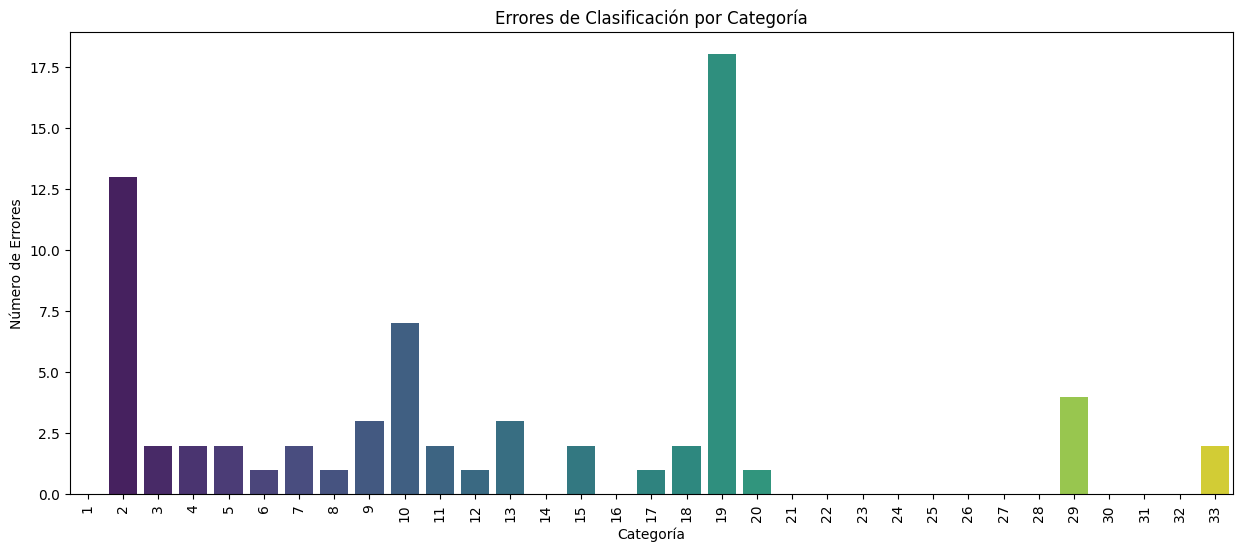

In [46]:

categorias_completas = list(range(1, 34))



results = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})
results['Error'] = results['Real'] != results['Predicción']

# Contar errores por categoría real
errores_por_categoria = results.groupby('Real')['Error'].sum()

# Inicializar DataFrame con todas las categorías con un conteo de errores de 0
errores_completos = pd.Series(index=categorias_completas, data=0).add(errores_por_categoria, fill_value=0)

# Visualizar
plt.figure(figsize=(15, 6))
sns.barplot(x=errores_completos.index, y=errores_completos.values, palette='viridis')
plt.title('Errores de Clasificación por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Número de Errores')
plt.xticks(rotation=90)
plt.show()


Comprobamos que mejoramos el modelo si utilizamos otras variables que no están correlacionadas entre sí.

**¿A qué se debe eso?**

- **Correlación no implica causalidad**: Solo porque algunas variables estén fuertemente correlacionadas con la variable objetivo, no necesariamente significa que causen el resultado o que sean útiles en un contexto predictivo.

 A veces, variables menos correlacionadas aportan más información útil debido a cómo capturan la variabilidad en los datos.

- **Problemas de colinealidad**: Utilizar variables altamente correlacionadas entre sí puede llevar a problemas de colinealidad, donde es difícil para el modelo diferenciar la contribución de cada característica. Esto puede debilitar el rendimiento del modelo en lugar de fortalecerlo.

- **Relevancia de las características**: No todas las características correlacionadas son igualmente importantes. Algunas pueden contener una gran cantidad de información redundante. Los modelos de RandomForest son capaces de manejar características irrelevantes hasta cierto punto, pero un exceso puede degradar el rendimiento del modelo.

- **Riesgo de sobreajuste**: Al incluir solo las características más correlacionadas, el modelo puede ajustarse demasiado bien a los datos de entrenamiento, perdiendo generalización. Esto puede llevar a un rendimiento más pobre en datos nuevos o de prueba.

- **Contribuciones únicas de otras variables**: A menudo, características que no están fuertemente correlacionadas con la variable objetivo pueden aportar "ángulos" únicos o diferentes tipos de información que ayudan al modelo a generalizar mejor. Esto es especialmente cierto en modelos complejos y no lineales como los bosques aleatorios.

- **Sinergias complejas**: RandomForestRegressor puede capturar interacciones no lineales entre características. En ocasiones, características que individualmente no están muy correlacionadas pueden, en combinación, proporcionar insights muy poderosos debido a su interacción.